In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [99]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';')

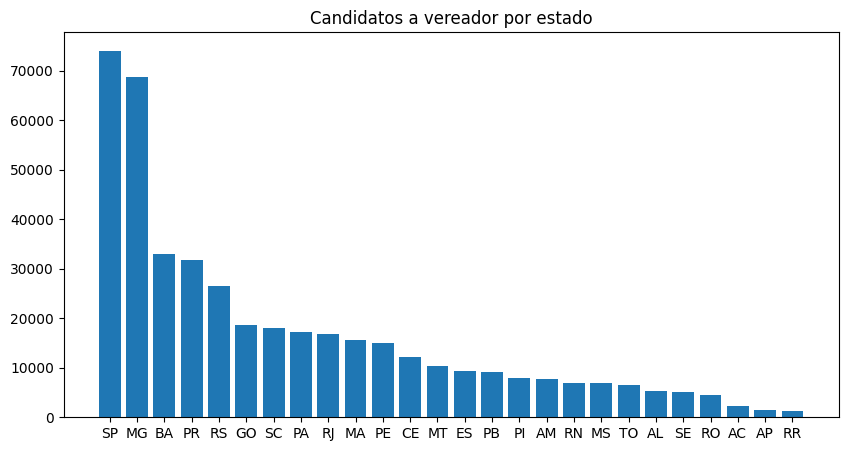

In [227]:
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
df_candidatos_vereador_by_uf = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_vereador_by_uf.index, df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a vereador por estado")
plt.show()

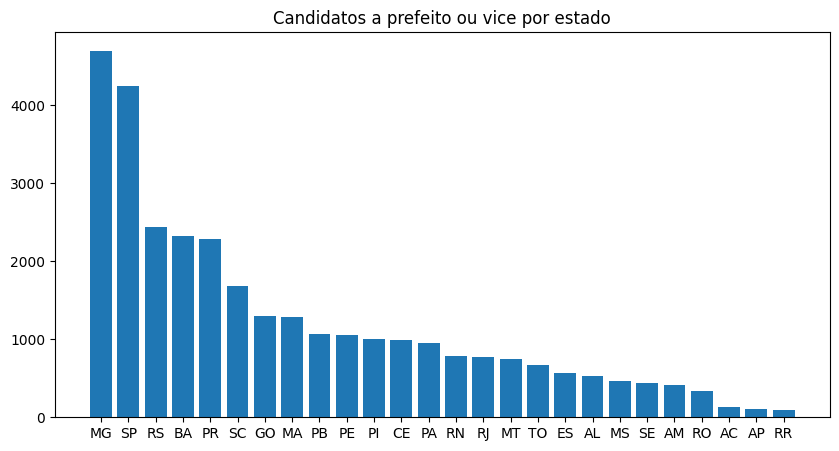

In [228]:
df_candidatos_prefeito_vice = df[df["DS_CARGO"] != "VEREADOR"]
df_candidatos_prefeitura_by_uf = df_candidatos_prefeito_vice[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_prefeitura_by_uf.index, df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a prefeito ou vice por estado")
plt.show()

In [229]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.merge(populcacao_por_estados, on="SG_UF")

   SG_UF  NM_URNA_CANDIDATO  POPULACAO  CAND_POR_MIL_HAB
19    TO               6527    1511460          4.318341
1     MG              68741   20538718          3.346898
22    RO               4532    1581196          2.866185
12    MT              10358    3658649          2.831100
3     PR              31718   11444380          2.771491
5     GO              18668    7056495          2.645506
23    AC               2183     830018          2.630063
18    MS               6897    2757013          2.501620
4     RS              26576   10882965          2.441982
15    PI               7977    3271199          2.438555
13    ES               9291    3833712          2.423500
6     SC              17933    7610361          2.356393
21    SE               5148    2209558          2.329878
2     BA              32879   14141626          2.324980
14    PB               9163    3974687          2.305339
9     MA              15543    6775805          2.293897
7     PA              17135    

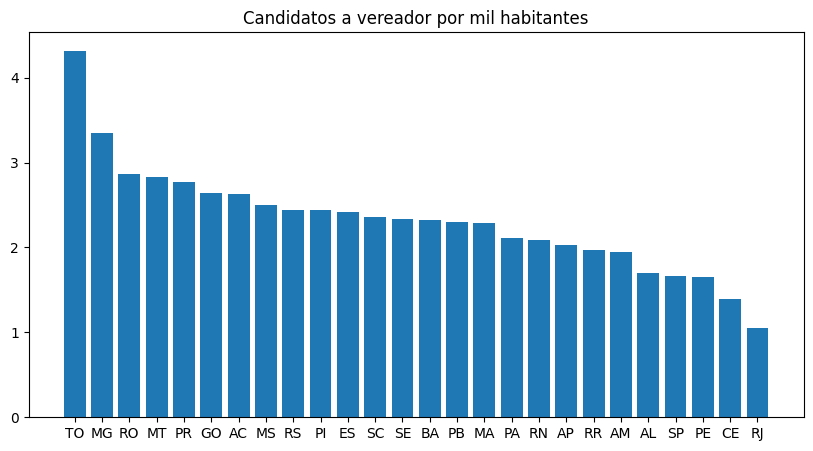

In [238]:
print(df_candidatos_vereador_by_uf)
df_candidatos_vereador_by_uf["CAND_POR_MIL_HAB"] = df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"]/(df_candidatos_vereador_by_uf["POPULACAO"]/1000)
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.sort_values(by="CAND_POR_MIL_HAB", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_vereador_by_uf["SG_UF"], df_candidatos_vereador_by_uf["CAND_POR_MIL_HAB"])
plt.title("Candidatos a vereador por mil habitantes")
plt.show()

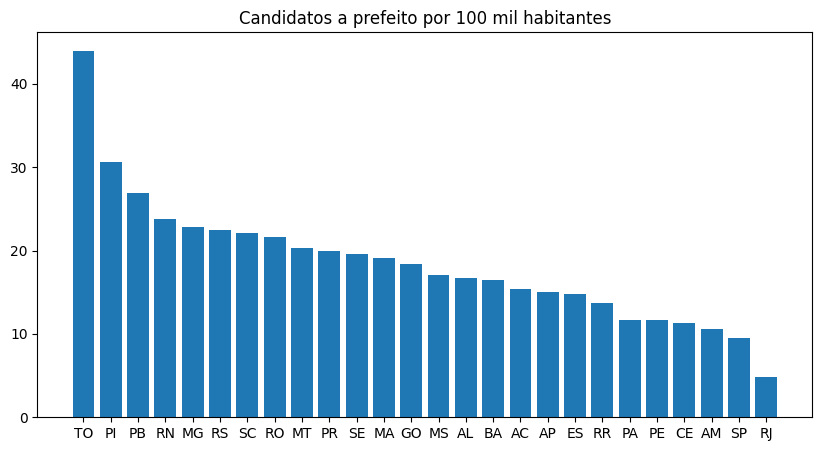

In [231]:
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.merge(populcacao_por_estados, on="SG_UF")
df_candidatos_prefeitura_by_uf["CAND_POR_100MIL_HAB"] = df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"]/(df_candidatos_prefeitura_by_uf["POPULACAO"]/100000)
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="CAND_POR_100MIL_HAB", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_prefeitura_by_uf["SG_UF"], df_candidatos_prefeitura_by_uf["CAND_POR_100MIL_HAB"])
plt.title("Candidatos a prefeito por 100 mil habitantes")
plt.show()

In [232]:
df_pop_grandes_cidades = pd.read_csv("populacao_grandes_cidades.csv", sep=";")
df_pop_grandes_cidades["CIDADE"] = df_pop_grandes_cidades["CIDADE"].apply(lambda x : x.upper())
df_pop_grandes_cidades

,CIDADE,POPULACAO
0,SÃO PAULO,11451999
1,RIO DE JANEIRO,6211223
2,BRASÍLIA,2817381
3,FORTALEZA,2428708
4,SALVADOR,2417678
...,...,...
314,MANACAPURU,101883
315,BALSAS,101767
316,LAGARTO,101579
317,ASSIS,101409


In [233]:
lista_de_cidades = list(df_pop_grandes_cidades["CIDADE"])
df_cand_vereador_grandes_cidades = df_candidatos_vereador[df_candidatos_vereador["NM_UE"].isin(lista_de_cidades)]\
[["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()
df_cand_vereador_grandes_cidades = df_pop_grandes_cidades.merge(df_cand_vereador_grandes_cidades, left_on="CIDADE", right_on="NM_UE")
df_cand_vereador_grandes_cidades["CAND_POR_MIL_HAB"] = df_cand_vereador_grandes_cidades["NM_URNA_CANDIDATO"]/(df_cand_vereador_grandes_cidades["POPULACAO"]/1000)
df_cand_vereador_grandes_cidades = df_cand_vereador_grandes_cidades.sort_values(by="CAND_POR_MIL_HAB", ascending=False)
df_cand_vereador_grandes_cidades

,CIDADE,POPULACAO,NM_URNA_CANDIDATO,CAND_POR_MIL_HAB
264,SÃO GONÇALO DO AMARANTE,115838,347,2.995563
199,SANTA RITA,149910,433,2.888400
312,ITUIUTABA,102217,292,2.856668
283,PAULÍNIA,110537,313,2.831631
263,FORMOSA,115901,323,2.786861
...,...,...,...,...
7,RECIFE,1488920,519,0.348575
14,MACEIÓ,957916,314,0.327795
2,FORTALEZA,2428708,771,0.317453
1,RIO DE JANEIRO,6211223,1028,0.165507


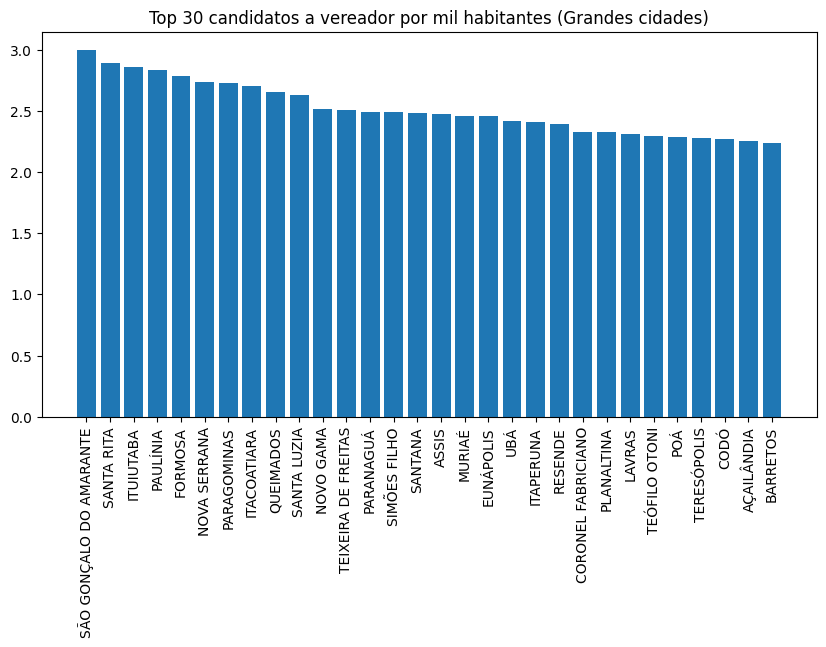

In [239]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_vereador_grandes_cidades.iloc[0:30]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[0:30]["CAND_POR_MIL_HAB"])
plt.title("Top 30 candidatos a vereador por mil habitantes (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()

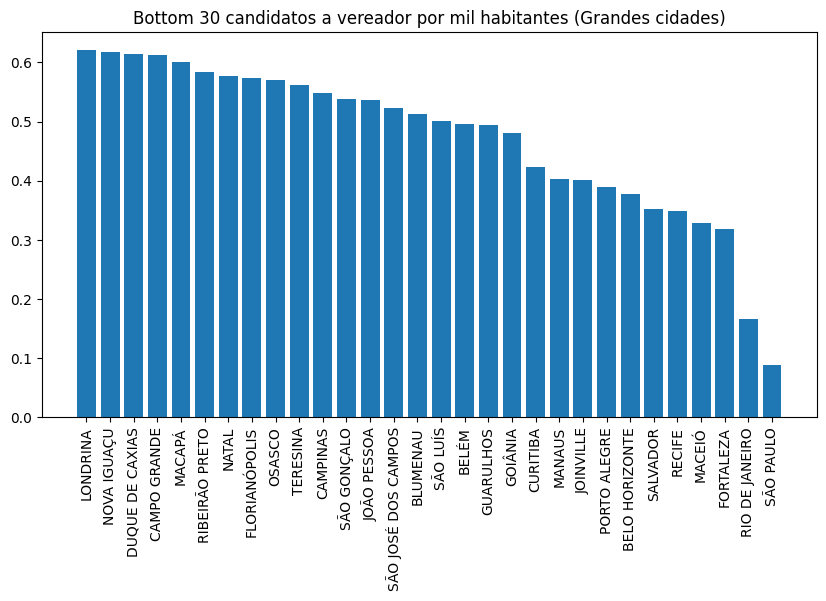

In [237]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_vereador_grandes_cidades.iloc[-30:]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[-30:]["CAND_POR_MIL_HAB"])
plt.title("Bottom 30 candidatos a vereador por mil habitantes (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()

In [240]:
df_cand_prefeito_vice_grandes_cidades = df_candidatos_prefeito_vice[df_candidatos_prefeito_vice["NM_UE"].isin(lista_de_cidades)]\
[["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()
df_cand_prefeito_vice_grandes_cidades = df_pop_grandes_cidades.merge(df_cand_prefeito_vice_grandes_cidades, left_on="CIDADE", right_on="NM_UE")
df_cand_prefeito_vice_grandes_cidades["CAND_POR_100MIL_HAB"] = df_cand_prefeito_vice_grandes_cidades["NM_URNA_CANDIDATO"]/(df_cand_vereador_grandes_cidades["POPULACAO"]/100000)
df_cand_prefeito_vice_grandes_cidades = df_cand_prefeito_vice_grandes_cidades.sort_values(by="CAND_POR_100MIL_HAB", ascending=False)
df_cand_prefeito_vice_grandes_cidades

,CIDADE,POPULACAO,NM_URNA_CANDIDATO,CAND_POR_100MIL_HAB
283,PAULÍNIA,110537,18,16.284140
196,ARAUCÁRIA,151666,21,13.846215
262,ITAGUAÍ,116841,16,13.693823
306,ITACOATIARA,103598,14,13.513774
255,SARANDI,118455,16,13.507239
...,...,...,...,...
2,FORTALEZA,2428708,18,0.741135
5,MANAUS,2063689,14,0.678397
3,SALVADOR,2417678,14,0.579068
1,RIO DE JANEIRO,6211223,18,0.289798


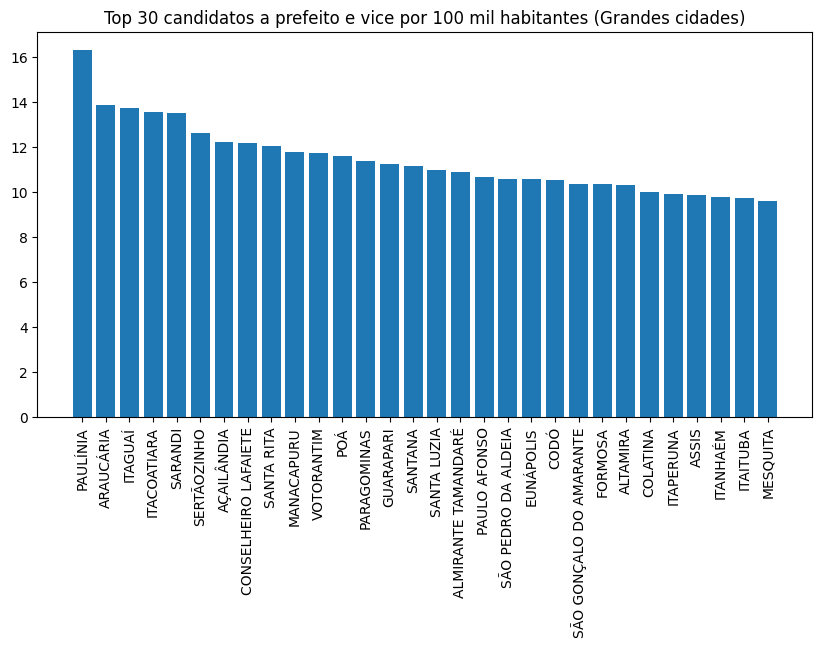

In [243]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_prefeito_vice_grandes_cidades.iloc[0:30]["CIDADE"], df_cand_prefeito_vice_grandes_cidades.iloc[0:30]["CAND_POR_100MIL_HAB"])
plt.title("Top 30 candidatos a prefeito e vice por 100 mil habitantes (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()

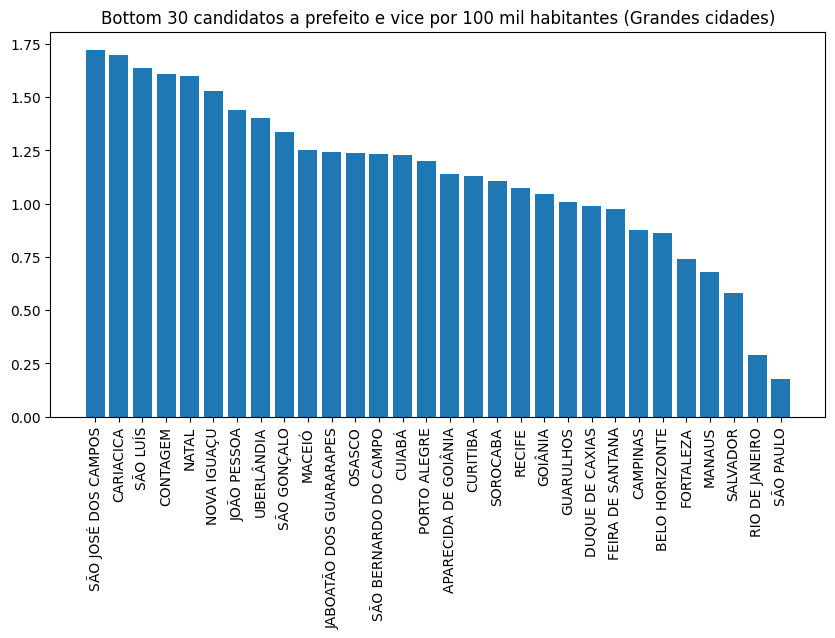

In [245]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_prefeito_vice_grandes_cidades.iloc[-30:]["CIDADE"], df_cand_prefeito_vice_grandes_cidades.iloc[-30:]["CAND_POR_100MIL_HAB"])
plt.title("Bottom 30 candidatos a prefeito e vice por 100 mil habitantes (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()

In [246]:
print(df.columns)

Index(['SG_UF', 'NM_UE', 'DS_CARGO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO',
       'NM_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO'],
      dtype='object')


In [388]:
df_candidatos_por_partido = df[["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_candidatos_por_partido = df_candidatos_por_partido.sort_values(by="NM_URNA_CANDIDATO", ascending = False)
display(df_candidatos_por_partido)

,SG_PARTIDO,NM_URNA_CANDIDATO
4,MDB,44481
14,PP,39907
18,PSD,38927
27,UNIÃO,36603
11,PL,36034
25,REPUBLICANOS,34026
22,PT,30133
17,PSB,26554
13,PODE,23805
10,PDT,22933


In [389]:
candidatos_partidos_pequenos = df_candidatos_por_partido[df_candidatos_por_partido["NM_URNA_CANDIDATO"] < 1000].sum()
display(candidatos_partidos_pequenos)

SG_PARTIDO           PCOPSTUUPPCB
NM_URNA_CANDIDATO             486
dtype: object

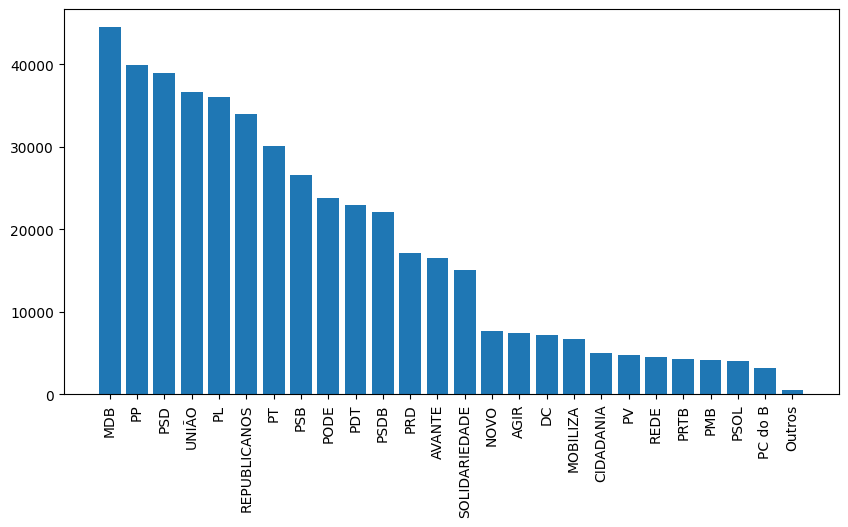

In [419]:
df_candidatos_por_partido = df_candidatos_por_partido[df_candidatos_por_partido["NM_URNA_CANDIDATO"]>= 1000]
df_candidatos_por_partido = df_candidatos_por_partido.append([candidatos_partidos_pequenos], ignore_index=True)
df_candidatos_por_partido.loc[df_candidatos_por_partido.index[-1], "SG_PARTIDO"] = "Outros"
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(df_candidatos_por_partido["SG_PARTIDO"], df_candidatos_por_partido["NM_URNA_CANDIDATO"])
plt.show()

In [421]:
df_cand_por_partido_e_cargo = df[df["DS_CARGO"] == "VEREADOR"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"}).rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"})
df_candidatos_prefeito_por_partido = df[df["DS_CARGO"] == "PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()
df_candidatos_vice_prefeito_por_partido = df[df["DS_CARGO"] == "VICE-PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()

df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_candidatos_prefeito_por_partido, on="SG_PARTIDO")
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "PREFEITO"})
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_candidatos_vice_prefeito_por_partido, on="SG_PARTIDO")
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.rename(columns={"NM_URNA_CANDIDATO": "VICE_PREFEITO"})

df_cand_por_partido_e_cargo["VEREADOR POR PREFEITO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["PREFEITO"]
df_cand_por_partido_e_cargo["VEREADOR POR VICE_PREFEITO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["VICE_PREFEITO"]
df_cand_por_partido_e_cargo["PREFEITO POR VICE"] = df_cand_por_partido_e_cargo["PREFEITO"]/df_cand_por_partido_e_cargo["VICE_PREFEITO"]
df_cand_por_partido_e_cargo["LEGISLATIVO POR EXECUTIVO"] = df_cand_por_partido_e_cargo["VEREADOR"]\
/(df_cand_por_partido_e_cargo["PREFEITO"] +  df_cand_por_partido_e_cargo["VICE_PREFEITO"])


display(df_cand_por_partido_e_cargo)

,SG_PARTIDO,VEREADOR,PREFEITO,VICE_PREFEITO,VEREADOR POR PREFEITO,VEREADOR POR VICE_PREFEITO,PREFEITO POR VICE,LEGISLATIVO POR EXECUTIVO
0,AGIR,7127,90,157,79.188889,45.394904,0.573248,28.854251
1,AVANTE,15694,390,435,40.241026,36.078161,0.896552,19.023030
2,CIDADANIA,4802,111,123,43.261261,39.040650,0.902439,20.521368
3,DC,6908,105,159,65.790476,43.446541,0.660377,26.166667
4,MDB,40826,1926,1729,21.197300,23.612493,1.113939,11.169904
5,MOBILIZA,6298,149,179,42.268456,35.184358,0.832402,19.201220
6,NOVO,7067,247,290,28.611336,24.368966,0.851724,13.160149
7,PC do B,3020,61,105,49.508197,28.761905,0.580952,18.192771
8,PCB,17,9,10,1.888889,1.700000,0.900000,0.894737
9,PCO,93,43,43,2.162791,2.162791,1.000000,1.081395


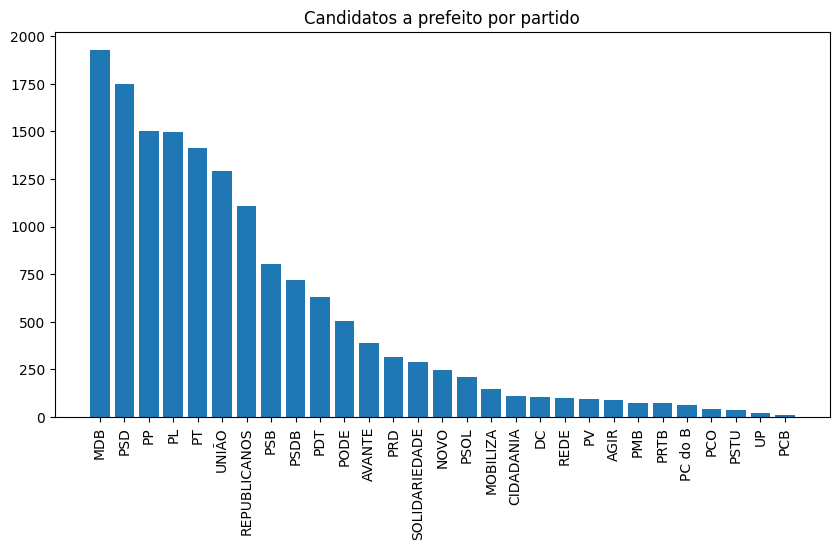

In [422]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["PREFEITO"])
plt.title("Candidatos a prefeito por partido")
plt.show()

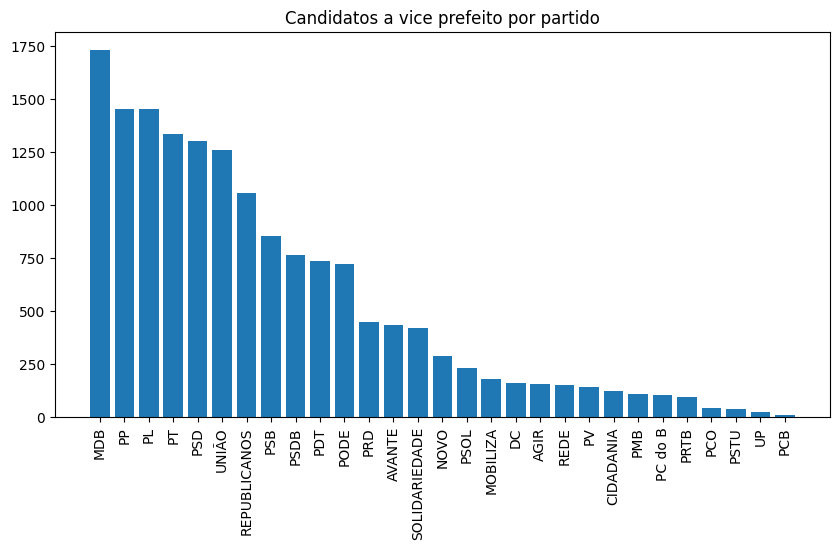

In [424]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VICE_PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Candidatos a vice prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VICE_PREFEITO"])
plt.show()

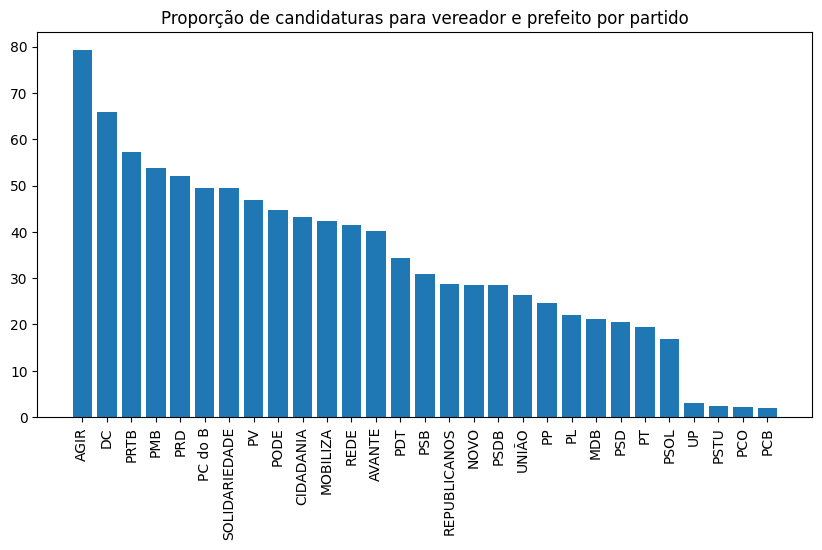

In [425]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VEREADOR POR PREFEITO"])
plt.show()

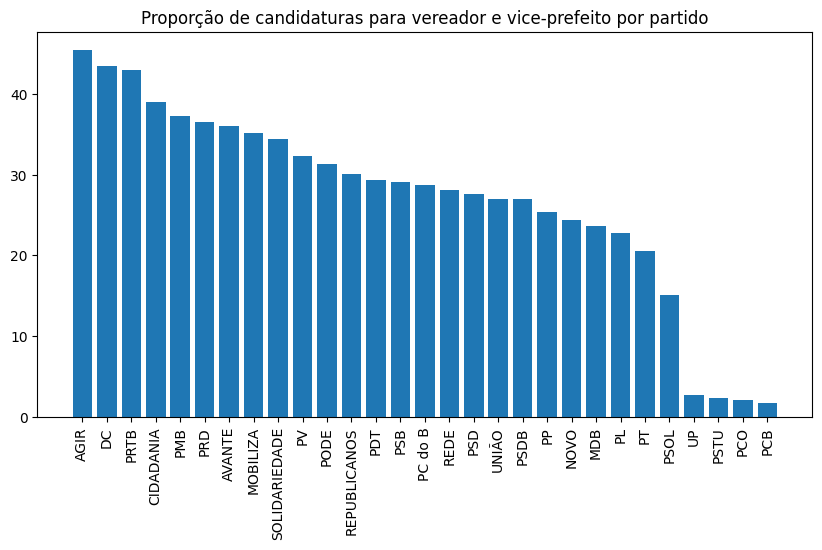

In [430]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR VICE_PREFEITO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["VEREADOR POR VICE_PREFEITO"])
plt.show()

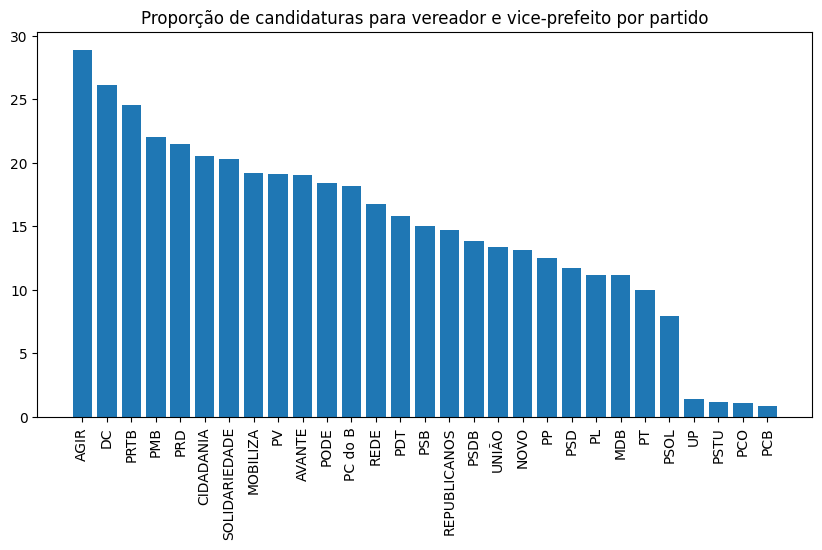

In [431]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="LEGISLATIVO POR EXECUTIVO", ascending=False)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["LEGISLATIVO POR EXECUTIVO"])
plt.show()

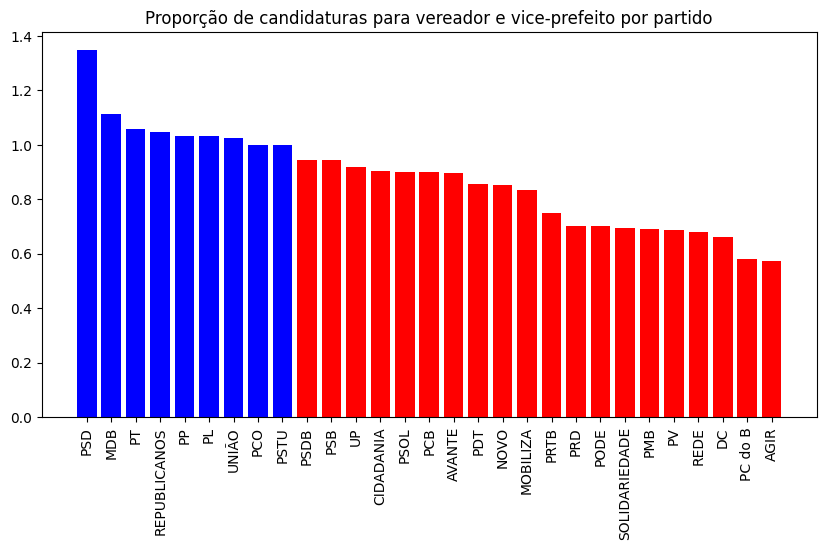

In [438]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="PREFEITO POR VICE", ascending=False)
bar_colors = ["red" if x[1]["PREFEITO POR VICE"] < 1 else "blue" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title("Proporção de candidaturas para vereador e vice-prefeito por partido")
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["PREFEITO POR VICE"], color=bar_colors)
plt.show()

Partidos em azul, no gráfico acima, ttem mais candidatos a prefeit